## Background

The Brexit was a term that refers to the withdrawal of the United Kingdom (UK) from the European Union (EU) after 40 years of relationship. Officially, the UK left on 31 January 2020, marking it as the first and sole country to ever left the EU. The term 'Brexit' refers to a combination of words *Britain* and *exit*. As Brexit has significant implications to the people of the UK, diversing opinions (positively and negatively) arose with the event. Some argue the merits of Brexit including more control over democracy, borders, and money that would improve several areas, e.g., healthcare, costumer rights, and environment. On the other end, people opposes the idea as the decision impact negatively in trade, migration, and investments. This complexity and delicacy are present in the  social media discussions such as in Twitter.

This is the first part of on the analysis of Brexit polarity tweets, which is the exploratory analysis part. The project aims to build a neural network-based classifier to predict whether a tweet is created by a user who supports or opposes Brexit. This analysis leverage data from Kaggle: [Brexit Polarity Tweets](https://www.kaggle.com/datasets/visalakshiiyer/twitter-data-brexit). 

The project's Github repository can be accessed [here](https://www.github.com/hanzholahs/brexit-polarity-tweets).


#### About the dataset

These datasets were collated as part of a dissertation project. This Twitter dataset covers the January - March 2022 period and comprises tweets relating to Brexit or Europe from Twitter accounts with publicly stated Brexit positions in their bio. It was collected using Boolean search for both types of users.

The Boolean search for **pro-Brexit** tweet is:

[(bio:"Brexit support" OR bio:"pro-brexit" OR bio:"pro brexit" OR bio:"Pro #Brexit" OR bio:brexiteer OR bio:probrexit) AND (EU OR Brexit OR CUSTOMS OR EUROPEAN OR EUROPE OR #Remain OR *Brexit OR #rejoinEU)]{style="font-family:Consolas,Monaco,Lucida Console,Liberation Mono,DejaVu Sans Mono,Bitstream Vera Sans Mono,Courier New;font-size:75%"}


The Boolean search for **anti-Brexit** tweet is: 

[(bio:"anti brexit" OR bio:"anti-brexit" OR bio:"antibrexit" OR bio:"Pro remain" OR bio:"pro-remain" OR bio:remainer) AND (EU OR BREXIT OR CUSTOMS OR EUROPEAN OR EUROPE OR #Remain OR *Brexit)]{style="font-family:Consolas,Monaco,Lucida Console,Liberation Mono,DejaVu Sans Mono,Bitstream Vera Sans Mono,Courier New;font-size:75%"}

## Environment Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

sns.set()

In [2]:
PATH_ANTI = './data/raw/TweetDataset_AntiBrexit_Jan-Mar2022.csv'
PATH_PRO  = './data/raw/TweetDataset_ProBrexit_Jan-Mar2022.csv'

## 1 Import Data

The first step is to import both datasets (`pro` and `anti`) then combine those into a single dataframe.

In [3]:
# import data from file
pro  = pd.read_csv(PATH_PRO)
anti = pd.read_csv(PATH_ANTI)

# add column for types of users
anti["Status"] = "Anti"
pro["Status"] = "Pro"

In [4]:
# ensure that datasets have identical column names & types  
assert np.all(pro.dtypes == anti.dtypes)
assert np.all(pro.columns == anti.columns)

# combine data
df = pd.concat([anti, pro], ignore_index = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358205 entries, 0 to 358204
Data columns (total 39 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             358205 non-null  int64  
 1   Date                   358205 non-null  object 
 2   Headline               0 non-null       float64
 3   URL                    358205 non-null  object 
 4   Opening Text           0 non-null       float64
 5   Hit Sentence           358205 non-null  object 
 6   Source                 358205 non-null  object 
 7   Influencer             358205 non-null  object 
 8   Country                358205 non-null  object 
 9   Subregion              0 non-null       float64
 10  Language               358205 non-null  object 
 11  Reach                  358205 non-null  int64  
 12  Desktop Reach          358205 non-null  int64  
 13  Mobile Reach           358205 non-null  int64  
 14  Twitter Social Echo    0 non-null   

## 2 Data Cleaning

The second step is to clean some problematic data in the dataset. Some columns contains irrelevant information or no information at all; thus, those columns are removed from the data. Identical tweets are removed based on the `Tweet Id` column. Another important process is to correctly represent date and time information.

#### Removing Irrelevant and Empty Columns 

In [5]:
# filter irrrelevant columns and columns with no data
irrelevant_cols = ["Unnamed: 0", "Source", "Time", "Alternate Date Format"]
non_null_cols = df.apply(lambda col: np.all(col.isna()))
non_null_cols = np.invert(non_null_cols)

df = df.drop(irrelevant_cols, axis = 1)
df = df.loc[:, non_null_cols]

#### Removing Duplicated Tweets

In [6]:
# remove duplicated tweets based on ID
df = df.drop_duplicates(subset = "Tweet Id")

#### Correcting Date and Time

In [7]:
df["DateTime"] = pd.to_datetime(df["Date"])
df["Time"] = df["DateTime"].dt.time
df["Date"] = df["DateTime"].dt.date

## 3 Exploratory Analysis

### Polarity

Tweets from Anti category outnumbered the other for more than 50 thousand tweets. This is illustrated from the graph. 

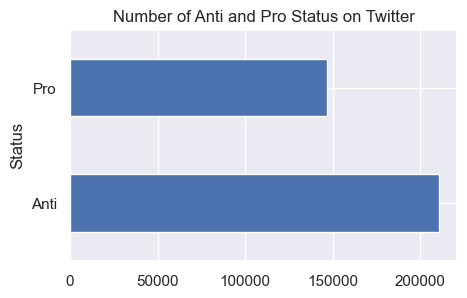

In [8]:
#| fig-align: center
df.groupby(['Status']).agg({'Tweet Id':['count']}).plot(kind='barh',figsize=(5, 3), legend = None) 

plt.title('Number of Anti and Pro Status on Twitter')
plt.show()

### Geographical Location

Most of the tweets came around the UK. This is expected as the people of the UK are the ones who have the greatest interest on the topic. We can see that the UK is placed at the top of the countries whereas the USA is the second.

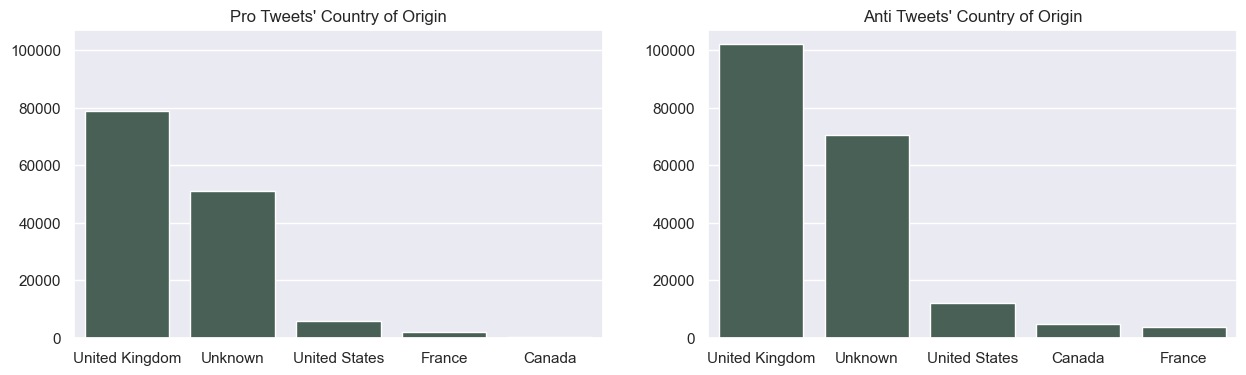

In [9]:
#| fig-align: center
top_countries = df.groupby("Country").agg({"Tweet Id": "count"}) \
    .sort_values("Tweet Id", ascending = False).head(5).index.values

country = df.groupby(["Country", "Status"], as_index = False)
country = country.agg({"Tweet Id": "count"})
country = country.iloc[np.isin(country["Country"], top_countries), :]
country = country.sort_values("Tweet Id", ascending = False)
country

plt.figure(figsize = (15, 4))

for i, status in enumerate(["Pro", "Anti"]):
    plt.subplot(1, 2, i+1)
    sns.barplot(x = "Country", y = "Tweet Id", color = "#456456", 
                data = country.loc[country["Status"] == status])
    plt.ylim(top = country["Tweet Id"].max() * 1.05)
    plt.title(f"{status} Tweets' Country of Origin")
    plt.ylabel(None)
    plt.xlabel(None)

plt.show()

As can be seen from the graph of the top 10 origin states of tweets below, people from the USA also have a great interest on the matter. Specifically, the number of tweets coming from England are around seven times hhigher than the second place, Scotland.

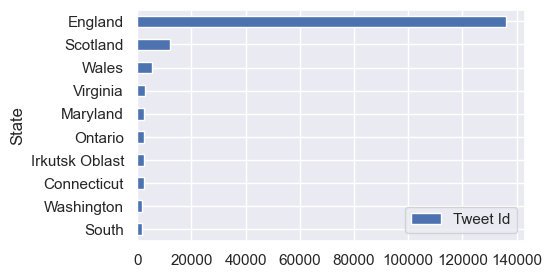

In [10]:
#| fig-align: center
state = df.groupby(["State"]) \
    .agg({"Tweet Id": "count"}) \
    .sort_values("Tweet Id") \
    .tail(10)
    
state.plot(kind = "barh", figsize = (5, 3))
plt.legend(loc = "lower right")
plt.show()

### Users' Devices

Both Pro and Anti groups demonstrated similar distribution of devices used. Slight difference can be found with the number of web app, which is more common for Pro users, and iPhone, which is more common for Anti users.

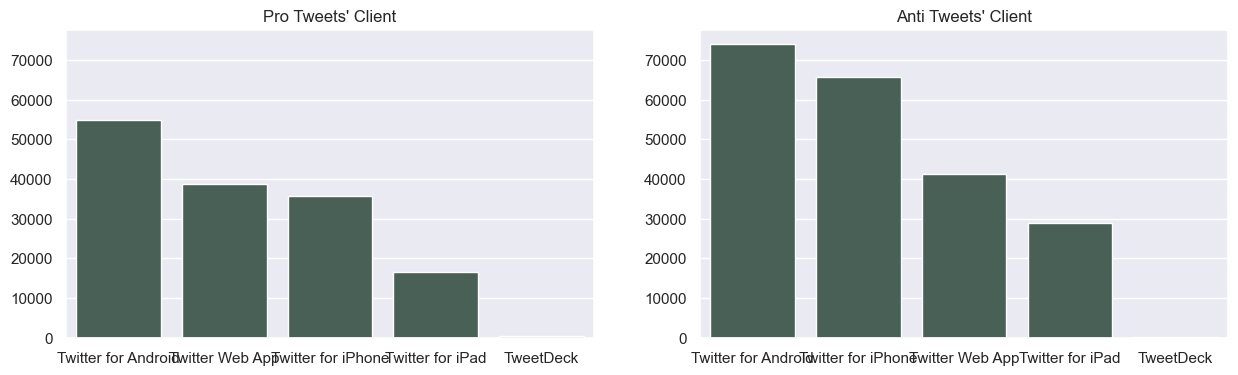

In [11]:
#| fig-align: center
top_devices = df.groupby("Twitter Client").agg({"Tweet Id": "count"}) \
    .sort_values("Tweet Id", ascending = False).head(5).index.values

devices = df.groupby(["Twitter Client", "Status"], as_index = False)
devices = devices.agg({"Tweet Id": "count"})
devices = devices.iloc[np.isin(devices["Twitter Client"], top_devices), :]
devices = devices.sort_values("Tweet Id", ascending = False)
devices

plt.figure(figsize = (15, 4))

for i, status in enumerate(["Pro", "Anti"]):
    plt.subplot(1, 2, i+1)
    sns.barplot(x = "Twitter Client", y = "Tweet Id", color = "#456456", 
                data = devices.loc[devices["Status"] == status])
    plt.ylim(top = devices["Tweet Id"].max() * 1.05)
    plt.title(f"{status} Tweets' Client")
    plt.ylabel(None)
    plt.xlabel(None)

plt.show()

### Timing of Tweets

The number of tweets fluctuated overtime, and it reached its peak between the end of February and and early March. We can see the distribution of the number of tweets from two graphs below. The second graph differentiate the distribution of Pro and Anti tweet categories.

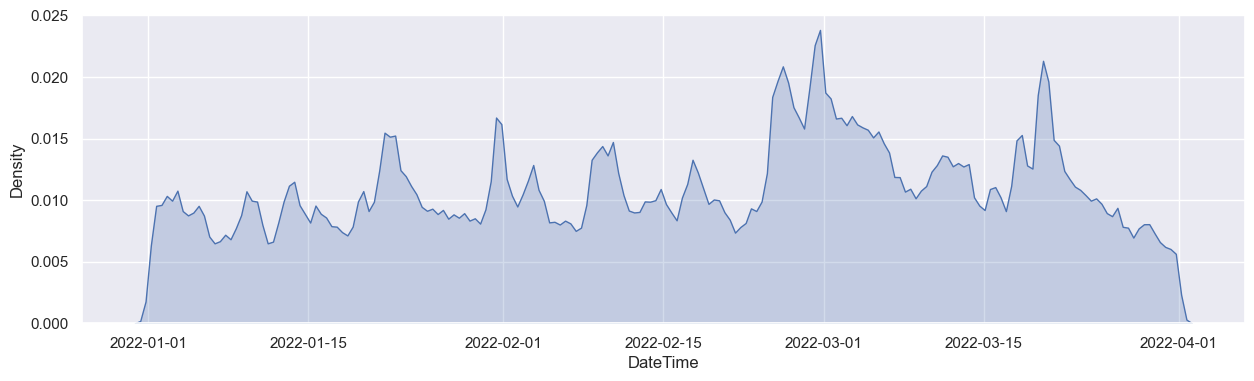

In [12]:
#| fig-align: center
plt.figure(figsize = (15, 4))
sns.kdeplot(x = "DateTime", data = df, fill = "DateTime", bw_adjust=0.2)
plt.show()

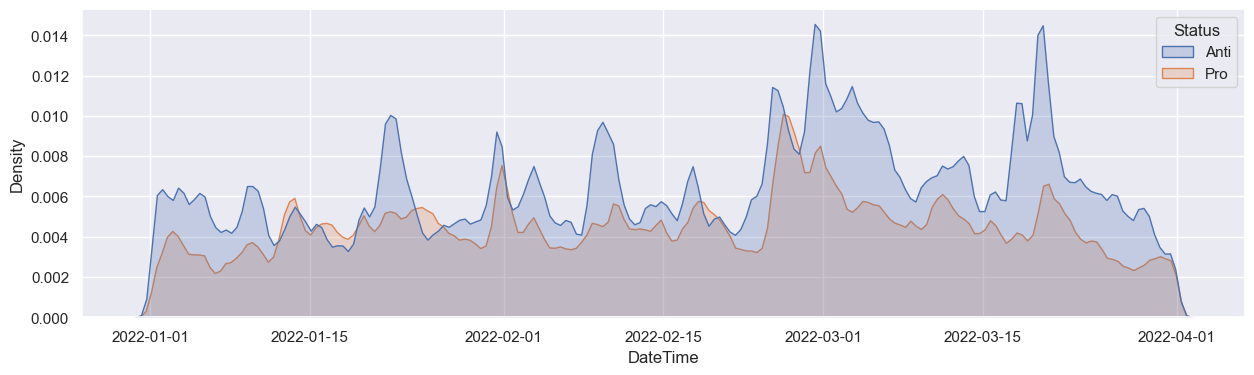

In [13]:
#| fig-align: center
plt.figure(figsize = (15, 4))
sns.kdeplot(x = "DateTime", hue = "Status", data = df, fill = "Status", bw_adjust=0.2)
plt.show()

It can be seen from the graph below that tweets were posted mostly during 8 a.m. to 10 p.m. with the peak reached around 9 o'clock in the morning. What might be interesting is that the increase in the number is caused by Anti tweets as the number decreased significantly after it reached its peak. The pattern was not found in the Pro tweets.

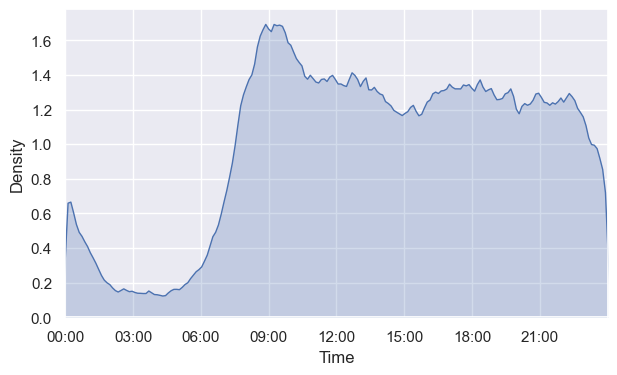

In [14]:
#| fig-align: center
from matplotlib import dates as mdates

df["Time"] = "2000-01-01 " + pd.to_datetime(df["DateTime"]).dt.time.astype(str)
df["Time"] = pd.to_datetime(df["Time"])

plt.figure(figsize = (7, 4))

ax = sns.kdeplot(x = "Time", data = df, fill = "Time", bw_adjust=0.2)

ax.set_xlim([pd.to_datetime('2000-01-01 00:00:00'),
             pd.to_datetime('2000-01-01 23:59:59')])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.show()

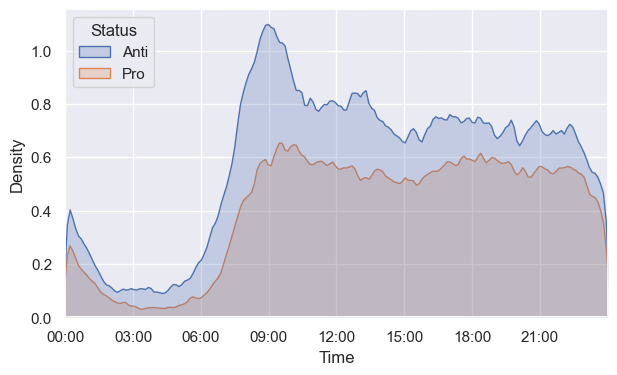

In [15]:
#| fig-align: center
from matplotlib import dates as mdates

plt.figure(figsize = (7, 4))

ax = sns.kdeplot(x = "Time", hue = "Status", data = df, fill = "Status", bw_adjust=0.2)

ax.set_xlim([pd.to_datetime('2000-01-01 00:00:00'),
             pd.to_datetime('2000-01-01 23:59:59')])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

sns.move_legend(ax, "upper left")
plt.show()

### Users' Engagement

Engagement can be demonstrated from the authority score and average engagement score. Twitter authority measure the influence of a user has in the platform based on metrics like retweet rate, activities, and follower & following counts. Average engagement refers to thhe number of interactions which might include likes, replies, clicks, etc.

From the boxplot below, it can be inferred that Twitter Authority Score follow a normal distribution with median of 6. On the other hand both distributions of the numbers of twitter followers and following has skewed shape. This can be expected as some users will have much more followers/following than the rest.

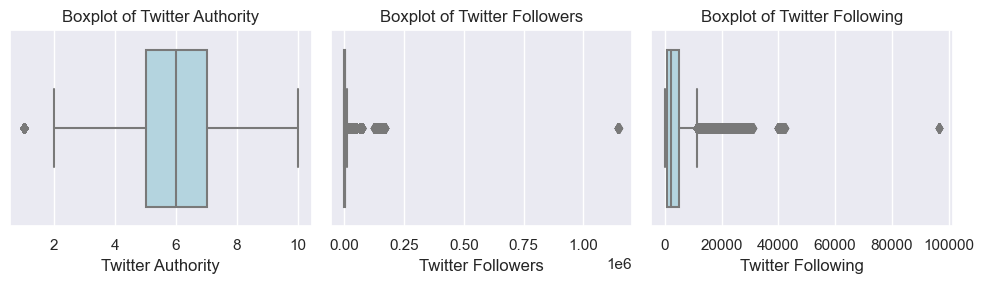

In [16]:
#| fig-align: center
list_of_columns = ['Twitter Authority','Twitter Followers','Twitter Following']

plt.figure(figsize=(10, 3))

for i in range(len(list_of_columns)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x = list_of_columns[i], data = df, color = 'lightblue')
    plt.title('Boxplot of {}'.format(list_of_columns[i]))
    plt.tight_layout()

plt.show()

We can also scrutinize the distribution of users' authority score based on its polarity. Both groups have similar bell shape distribution of authority.

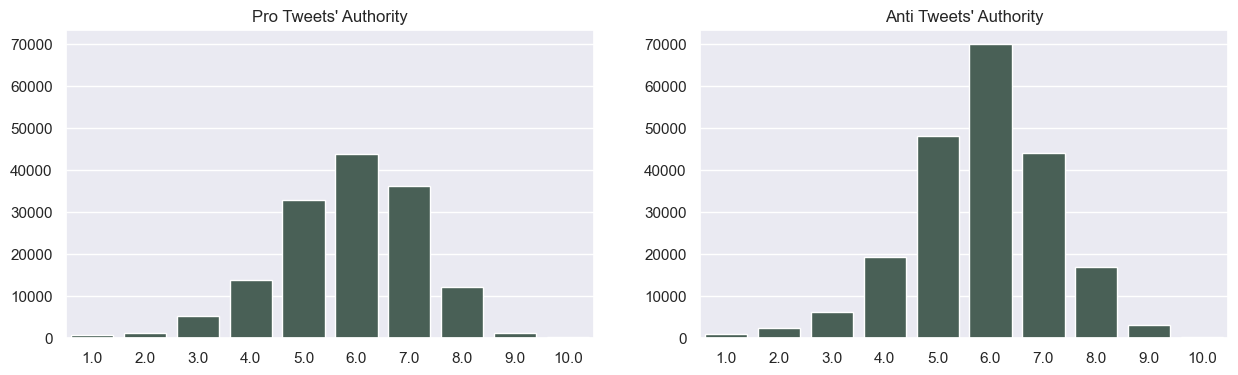

In [17]:
#| fig-align: center
authority = df.groupby(["Twitter Authority", "Status"], as_index = False)
authority = authority.agg({"Tweet Id": "count"})
authority = authority.sort_values("Tweet Id", ascending = False)
authority

plt.figure(figsize = (15, 4))

for i, status in enumerate(["Pro", "Anti"]):
    plt.subplot(1, 2, i+1)
    sns.barplot(x = "Twitter Authority", y = "Tweet Id", color = "#456456", 
                data = authority.loc[authority["Status"] == status])
    plt.ylim(top = authority["Tweet Id"].max() * 1.05)
    plt.title(f"{status} Tweets' Authority")
    plt.ylabel(None)
    plt.xlabel(None)

plt.show()

The relationship between twitter authority and engagement is positive, meaning the effectiveness of a tweet from a user will be increased as the authority increase. This is illustrated from the graph below.

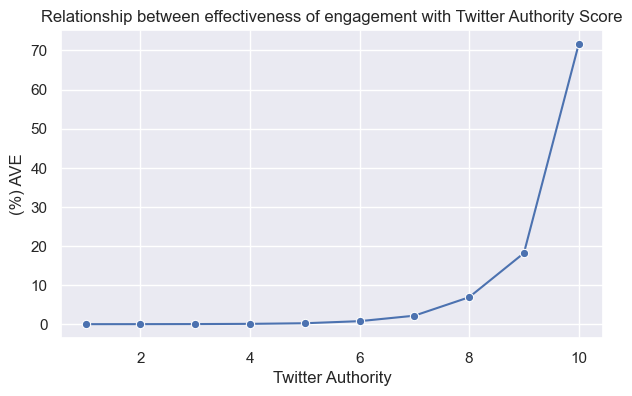

In [18]:
#| fig-align: center
effectiveness = df.groupby(["Twitter Authority"]) \
      .agg({"AVE": "mean",
            "Twitter Following": "mean",
            "Twitter Followers": "mean"}) \
      .agg({"AVE": (lambda x: 100 * x / sum(x)),
            "Twitter Following": (lambda x: 100 * x / sum(x)),
            "Twitter Followers": (lambda x: 100 * x / sum(x))}) \
      .reset_index()

sns.set(rc={'figure.figsize':(7, 4)})
sns.lineplot(x = "Twitter Authority", y = "AVE", data = effectiveness, marker = "o")

plt.title('Relationship between effectiveness of engagement with Twitter Authority Score')
plt.xlabel("Twitter Authority")
plt.ylabel("(%) AVE")
plt.show()

The graph below represents the relationship between twitter authority and the numbers of following and followers. Similar positive relationship can be found in both. However, there is a significant decrease on the average number of following from users' with authority of 9 to 10.

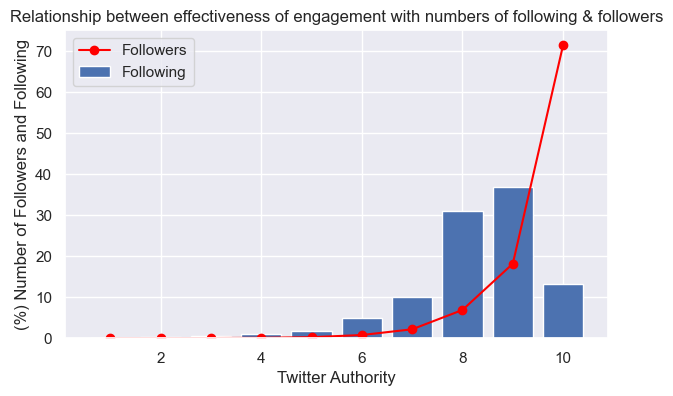

In [19]:
#| fig-align: center
plt.figure(figsize=(7, 4))

plt.bar("Twitter Authority", "Twitter Following", data = effectiveness, label = "Following")
plt.plot("Twitter Authority", "Twitter Followers", data = effectiveness, c = "red", marker = "o", 
         label = "Followers")

plt.title('Relationship between effectiveness of engagement with numbers of following & followers')
plt.xlabel('Twitter Authority')
plt.ylabel('(%) Number of Followers and Following')
plt.legend()
plt.show()

## Conclusion

Based on the analysis above, some conclusions can be drawn. Tweets that oppose the idea of Brexit are more common based on the period of data collection. It might be the indicatation that that people tend to disagree with the idea of the UK withdrawing its membership from the EU. Nevertheless, the notion is restricted only to the period of observation. 

Most users are from the UK, but some are from other countries including the USA, Canada, and France. The discussion on Brexit, as can be represented by the number of tweets given a period time, intensified between the end of February and early March 2022. Daily, more tweets are typically written between 8.15 and 10 in the morning where users generally use Android, iPhone, Web App, and Ipad.

As one can expect, most Anti's and Pro's tweets come from user that has score of twitter authority = 6, and the pattern of relationship between Status and Twitter Authority create normal distribution which shows that the data near the mean are more frequent in occurrence than data far from the mean. 


<!-- - Most tweets are from accounts residing in the UK. Other countries commenting on the matter include the USA, Canada, France, Iceland, Cameroon, and Russia.
- There are more Anti-tweets than Pro-tweets worldwide; it might be the indicatation that that people tend to disagree with the idea of the UK withdrawing its membership from the EU. Nevertheless, the notion is restricted only to the period of observation. 
- There is a trend where users with more connections (i.e., having higher numbers of followers and followings than the rest) are more likely to oppose Brexit policy.
- Most Anti's and Pro's tweets come from user that has score of twitter authority = 6, and the pattern of relationship between Status and Twitter Authority create normal distribution which shows that the data near the mean are more frequent in occurrence than data far from the mean. So, the tweets of anti and pro are average on engaging the twitter users. -->

<!-- - Between 24 February and 6 March  -->
<!-- - Most Pro's Tweets: 2022-02-25 -->
<!-- - Most Anti's Tweets: 2022-02-28 -->
<!-- - Most Tweets came from UK and united States -->
<!-- - Pro's and Anti's tweets were usually done in the range of 8:15 AM to 10.00 AM which is a normal time for young people to use twitter. -->
<!-- - User that have more numbers of followers and following, tweets more about Anti Brexit than user that have few number followers and following. -->
<!-- - Twitter's users mostly use Android, iPhone, Web App, and Ipad. It is shown us too that people from UK, United States, Canada, France, and another country in this data more likely to use Android rather than iPhone. -->